<a href="https://colab.research.google.com/github/kevinash/awesome-ai/blob/main/notebooks/5_FacesAndExpressions/MediaPipe_Face_Mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

In [ ]:
!pip install numpy==1.19.3
!pip install mediapipe

Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving garrett-jackson-auTAb39ImXg-unsplash .jpg to garrett-jackson-auTAb39ImXg-unsplash .jpg
Saving radu-florin-JyVcAIUAcPM-unsplash .jpg to radu-florin-JyVcAIUAcPM-unsplash .jpg


garrett-jackson-auTAb39ImXg-unsplash .jpg


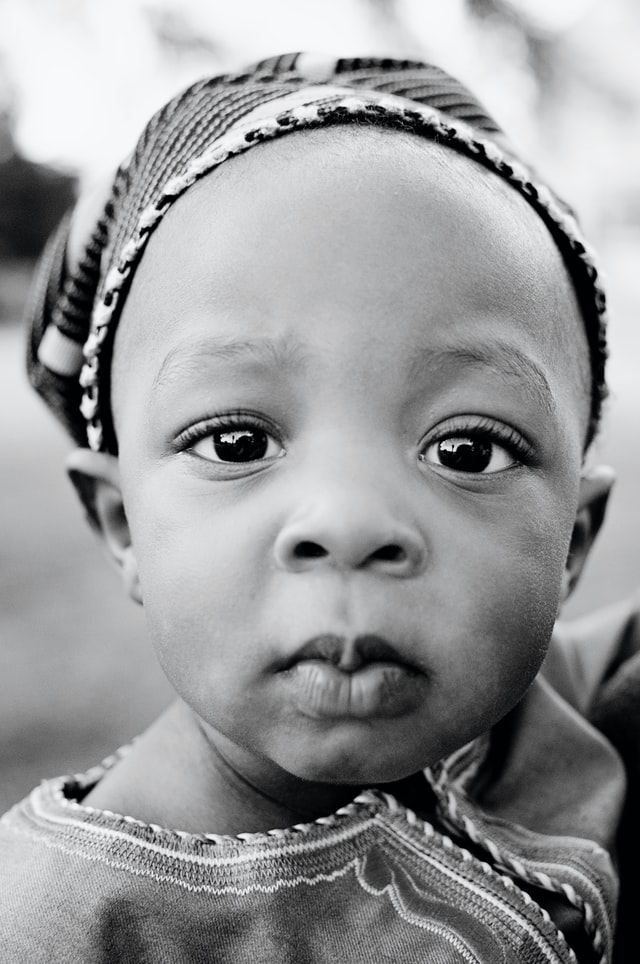

radu-florin-JyVcAIUAcPM-unsplash .jpg


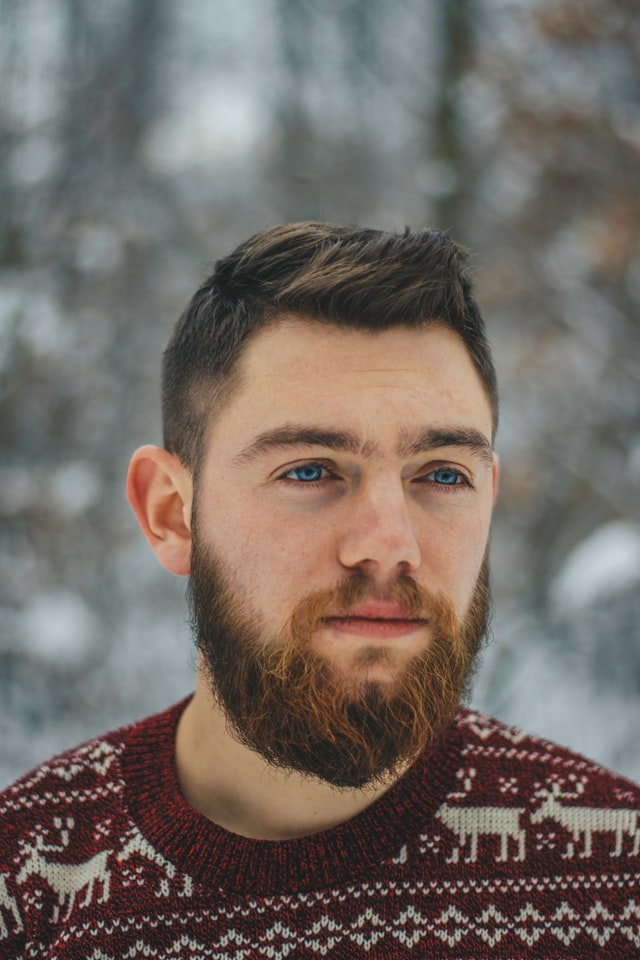

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as `mp_face_mesh = mp.solutions.face_mesh`.

You may change the parameters, such as `static_image_mode`, `max_num_faces`, and `min_detection_confidence`, during the initialization. Run `help(mp_face_mesh.FaceMesh)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe FaceMesh.
 |  
 |  MediaPipe FaceMesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe FaceMesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and possibly unrelated images, or a video stream. See 

In [ ]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face landmarks of garrett-jackson-auTAb39ImXg-unsplash .jpg:


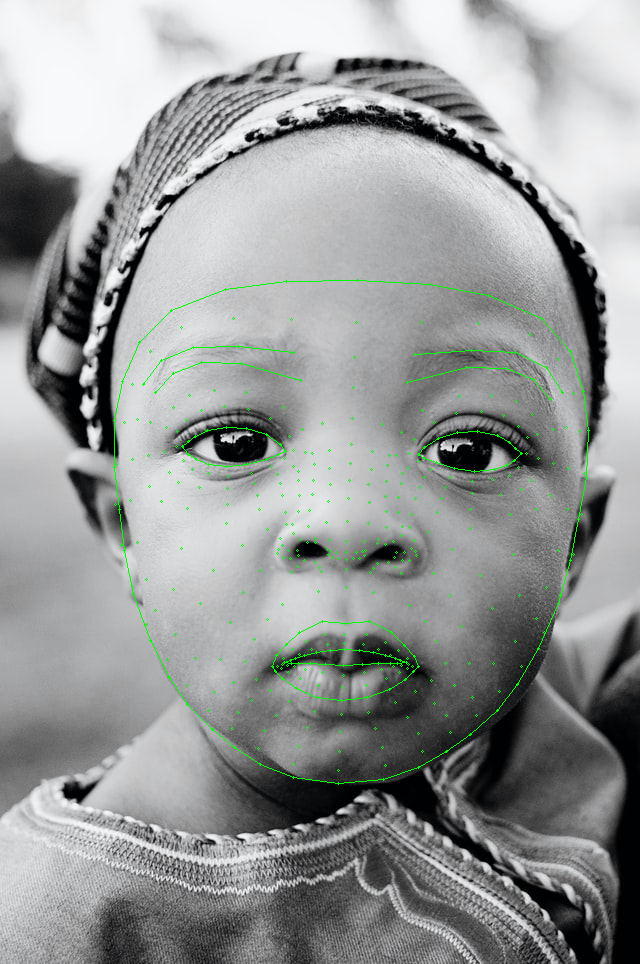

Face landmarks of radu-florin-JyVcAIUAcPM-unsplash .jpg:


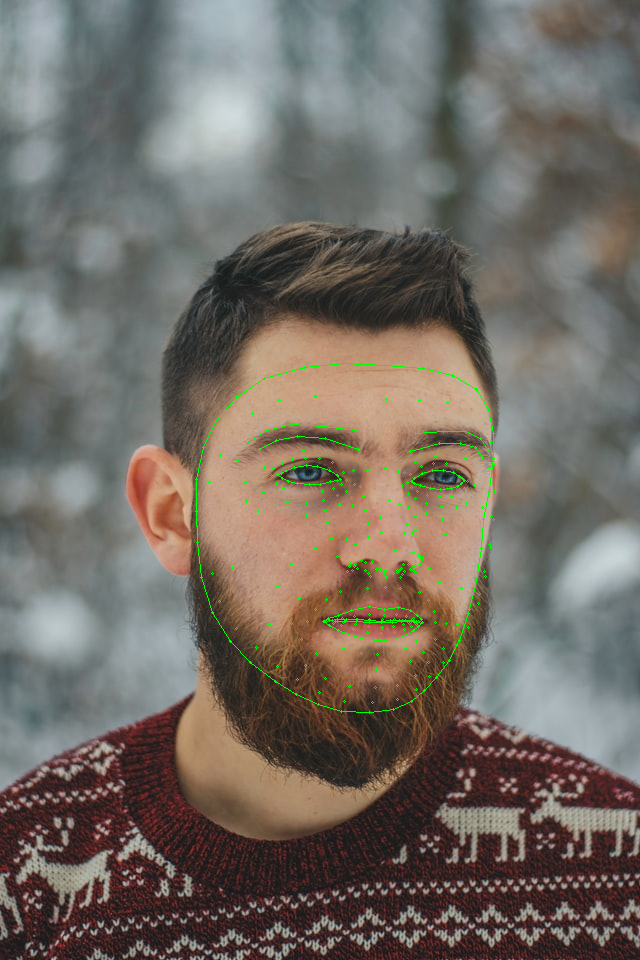

In [ ]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    cv2_imshow(annotated_image)